In [148]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [149]:
#Q1.1:
FifaData = pd.read_csv('/Users/klnimri/Desktop/MachineLearningLab3/archive/players_22.csv')

In [150]:
#Q1.2 + Q1.3:
ColumnsForClustering = ["overall", "potential", "wage_eur", "value_eur", "age"]
Clustering_data = FifaData[ColumnsForClustering].dropna()

In [151]:
#Q1.4:
DataForScaling = Clustering_data
ScaledData = ((DataForScaling - DataForScaling.min()) / (DataForScaling.max() - DataForScaling.min())) * 10 + 1
Clustering_data = ScaledData

In [152]:
#Q1.5:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Clustering_data)

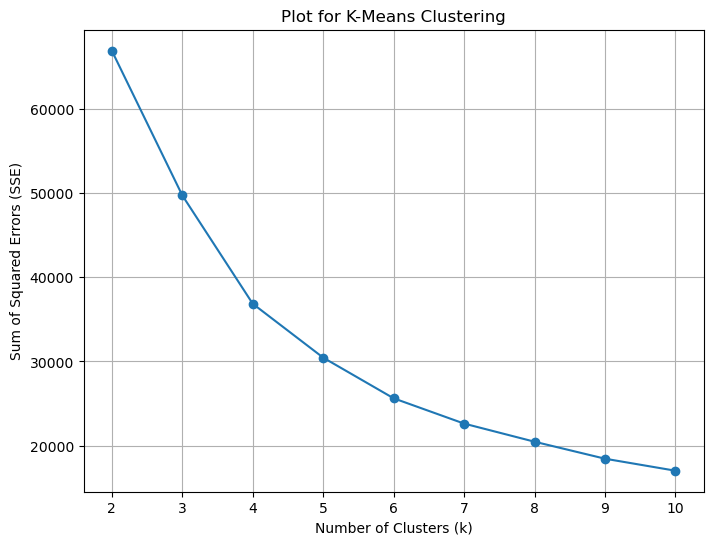

In [153]:
#Q1.5:
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init =3 ,random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Plot for K-Means Clustering')
plt.grid(True)
plt.show()

In [154]:
#Q1.6
#Depending on the plot, the best value for k is 6

In [155]:
#Q2.1
CountriesData = pd.read_csv('/Users/klnimri/Desktop/MachineLearningLab3/countries_continents.csv')

In [156]:
#Q2.3
CountriesData['country_id'] = range(len(CountriesData))

continent_mapping = {continent: idx for idx, continent in enumerate(CountriesData['Continent'].unique())}
CountriesData['continent_id'] = CountriesData['Continent'].map(continent_mapping)

features = CountriesData[['Latitude', 'Longitude']].values

In [157]:
#Q2.4
actual_num_clusters = CountriesData['continent_id'].nunique()

In [164]:
#Q2.4 
kmeans = KMeans(n_clusters=actual_num_clusters, random_state=2)
clusters = kmeans.fit_predict(features)

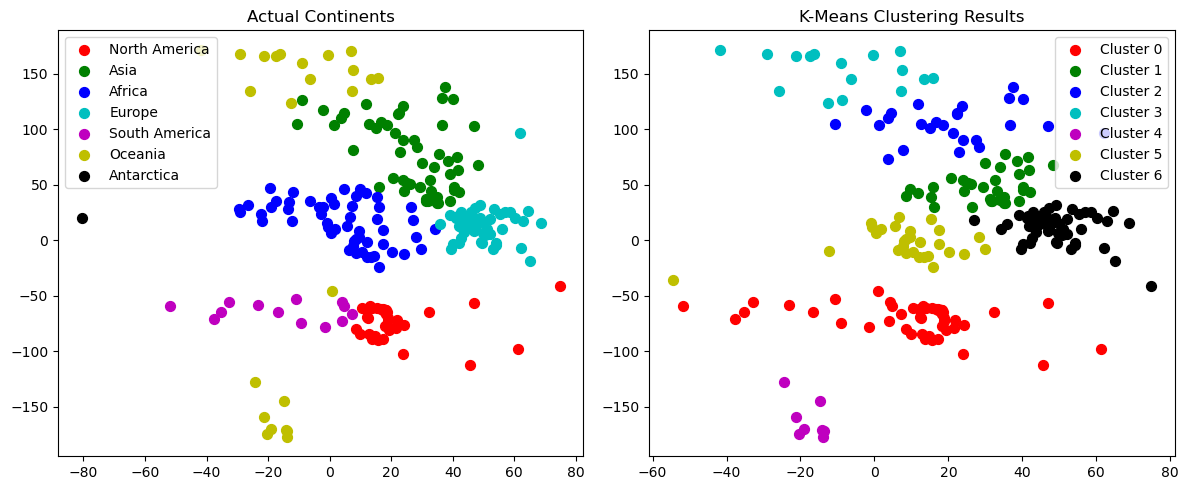

In [165]:
#Q2.5
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for continent, color in zip(CountriesData['Continent'].unique(), ['r', 'g', 'b', 'c', 'm', 'y', 'k']):
    subset = CountriesData[CountriesData['Continent'] == continent]
    plt.scatter(subset['Latitude'], subset['Longitude'], label=continent, c=color, marker='o', s=50)
plt.title("Actual Continents")
plt.legend()

plt.subplot(1, 2, 2)
for cluster, color in zip(range(actual_num_clusters), ['r', 'g', 'b', 'c', 'm', 'y', 'k']):
    subset = features[clusters == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}', c=color, marker='o', s=50)
plt.title("K-Means Clustering Results")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Student name: Khalid Nimri
#Student ID: 2140145